In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("/content/house Price Dataset.csv")

In [3]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [6]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [7]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [8]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3474    False
3475    False
3476     True
3477    False
3478    False
Length: 3456, dtype: bool

In [12]:
df.duplicated().sum()

208

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/house Price Dataset.csv')

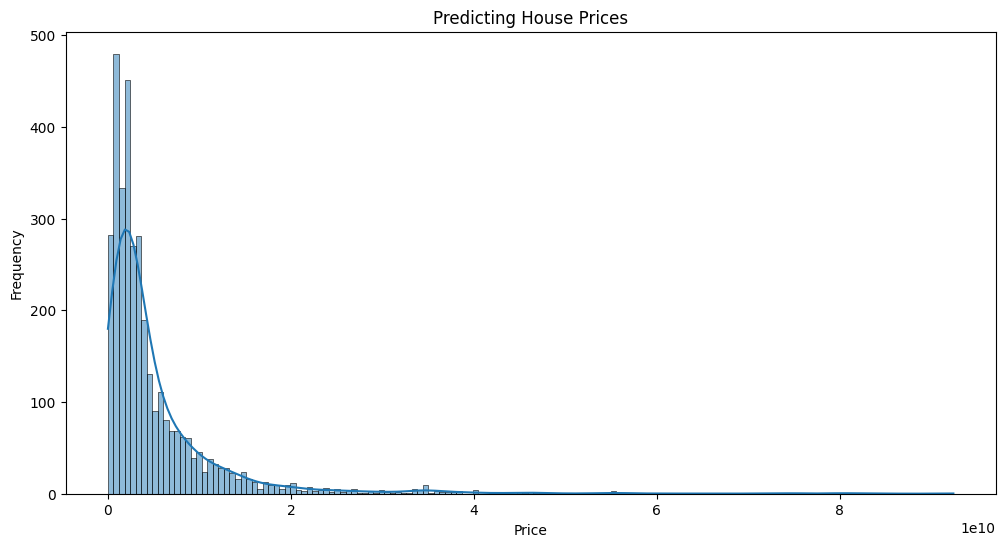

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Predicting House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


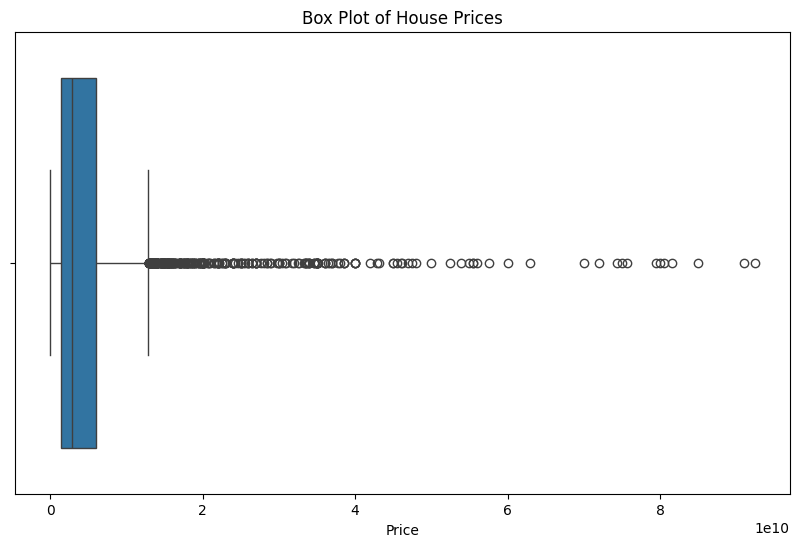

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

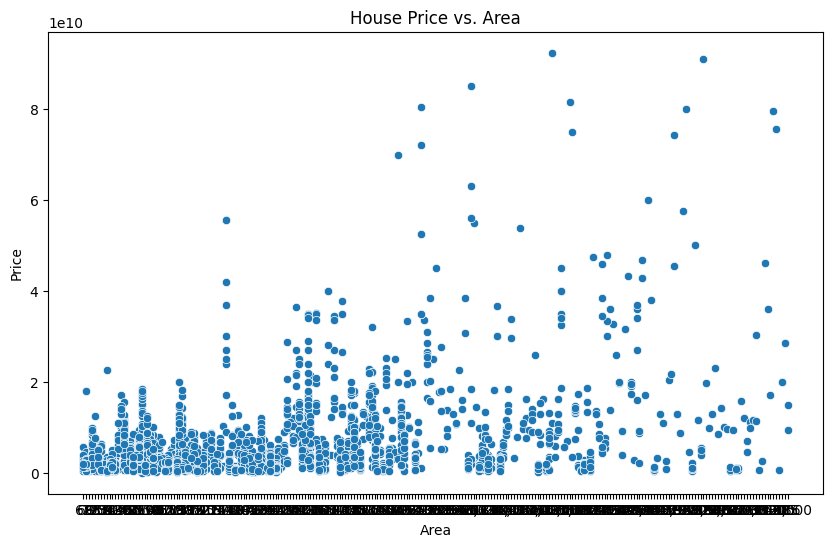

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('House Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


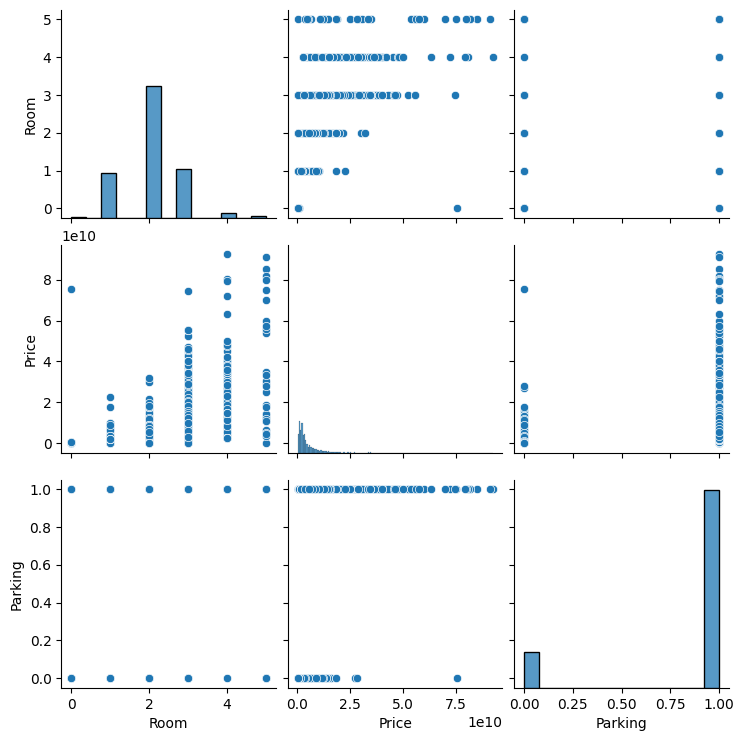

In [19]:
sns.pairplot(df[['Area', 'Room', 'Price', 'Parking']])
plt.show()


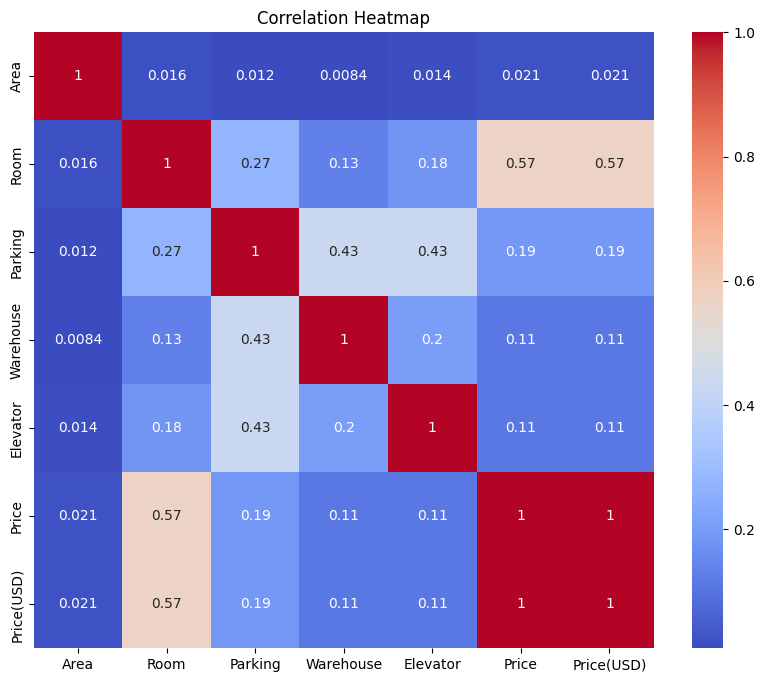

In [20]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

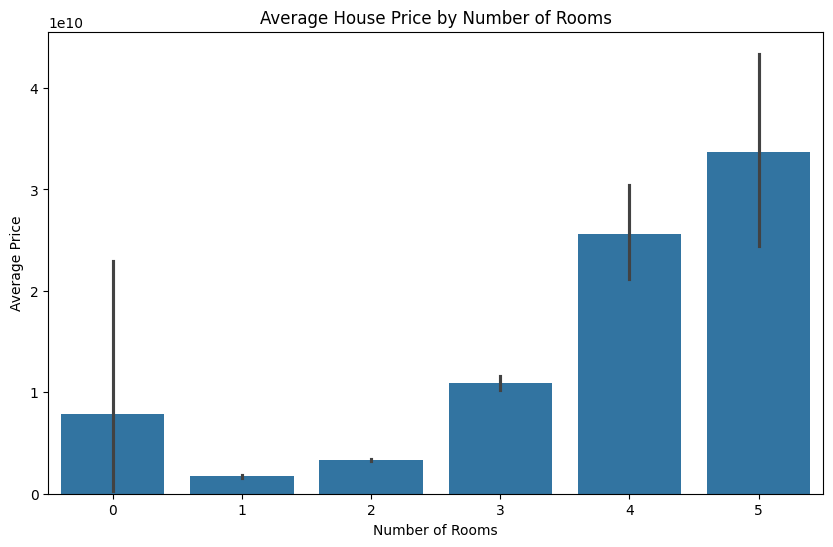

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Room', y='Price', data=df)
plt.title('Average House Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.show()

In [22]:
df['new_feature'] = df['Price'] - df['Price(USD)']

In [23]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),new_feature
0,63,1,True,True,True,1.850000e+09,61666.67,1.849938e+09
1,60,1,True,True,True,1.850000e+09,61666.67,1.849938e+09
2,79,2,True,True,True,5.500000e+08,18333.33,5.499817e+08
3,95,2,True,True,True,9.025000e+08,30083.33,9.024699e+08
4,123,2,True,True,True,7.000000e+09,233333.33,6.999767e+09


In [24]:
df['Addtion']=df['Parking']+df['Warehouse']+df['Elevator']+df['Price']

In [25]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),new_feature,Addtion
0,63,1,True,True,True,1.850000e+09,61666.67,1.849938e+09,1.850000e+09
1,60,1,True,True,True,1.850000e+09,61666.67,1.849938e+09,1.850000e+09
2,79,2,True,True,True,5.500000e+08,18333.33,5.499817e+08,5.500000e+08
3,95,2,True,True,True,9.025000e+08,30083.33,9.024699e+08,9.025000e+08
4,123,2,True,True,True,7.000000e+09,233333.33,6.999767e+09,7.000000e+09
5,70,2,True,True,False,2.050000e+09,68333.33,2.049932e+09,2.050000e+09
6,87,2,True,True,True,6.000000e+08,20000.00,5.999800e+08,6.000000e+08
7,59,1,True,True,True,2.150000e+09,71666.67,2.149928e+09,2.150000e+09
8,54,2,True,True,False,4.930000e+08,16433.33,4.929836e+08,4.930000e+08
9,71,1,True,True,True,2.370000e+09,79000.00,2.369921e+09,2.370000e+09


In [26]:
import seaborn as sns

In [37]:
df=pd.read_csv('/content/house Price Dataset.csv')

In [38]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [29]:
df=df[['Address','Price']]

In [30]:
df

,Address,Price
0,Shahran,1.850000e+09
1,Shahran,1.850000e+09
2,Pardis,5.500000e+08
3,Shahrake Qods,9.025000e+08
4,Shahrake Gharb,7.000000e+09
...,...,...
3474,Southern Janatabad,3.500000e+09
3475,Niavaran,6.800000e+09
3476,Parand,3.650000e+08
3477,Dorous,5.600000e+09


In [31]:
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Area'>

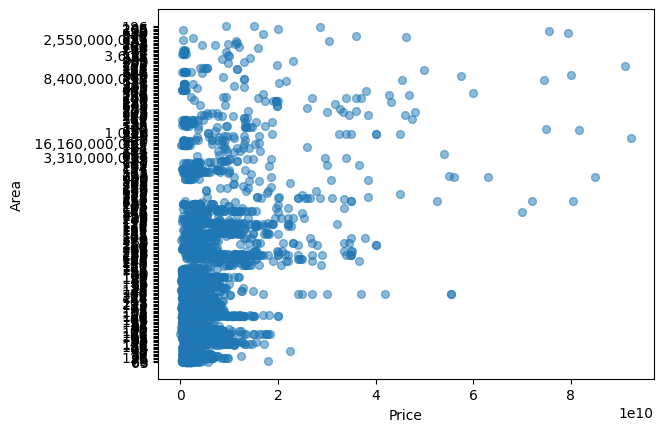

In [39]:
df.plot(kind='scatter', x='Price', y='Area', s=32, alpha=0.5)

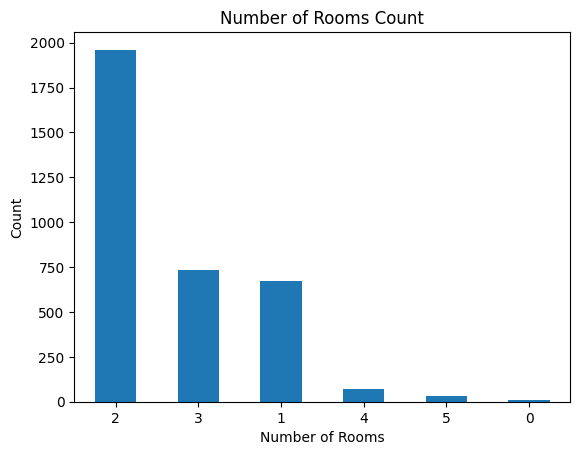

In [40]:
Room_count=df['Room'].value_counts()
Room_count.plot(kind='bar')
plt.title('Number of Rooms Count')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

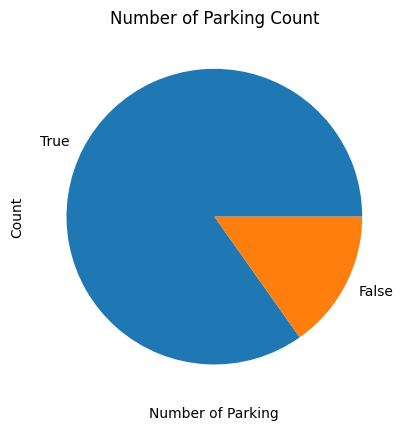

In [41]:
Parking_count=df['Parking'].value_counts()
Parking_count.plot(kind='pie')
plt.title('Number of Parking Count')
plt.xlabel('Number of Parking')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
df = pd.read_csv('/content/house Price Dataset.csv')

In [44]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
